# Experiment for improving your dance project [IMAGE&VIDEO Subj.]

In [15]:
import numpy as np
import cv2
import time
import mediapipe as mp
import datetime
import statistics as stat
from ffpyplayer.player import MediaPlayer

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [16]:
# Define function for calculating Angle Difference

def calculate_angle(first,mid,end):
    a = np.array(first) # First
    b = np.array(mid) # Mid
    c = np.array(end) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [17]:
calculate_angle([1,1],[2,2],[3,4])

161.56505117707798

In [18]:
# Define function for Cosine Similarity Distance

def calculate_cosinesim(source, test):
    
    a = np.matmul(np.transpose(source), test)
    b = np.sum(np.multiply(source, source))
    c = np.sum(np.multiply(test, test))
    
    return (a / (np.sqrt(b)*np.sqrt(c)))

In [19]:
calculate_cosinesim([1,1],[2,2])

0.9999999999999998

In [20]:
# Define function Average Value

def average_value(value_list):
    
    average = sum(value_list)/len(value_list)
    
    return average

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

In [21]:
## Preparing Optimize Code

# joint_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
# name_list = ['nose',...]

# for joint_num in joint_list:
#     x_axis=landmarks[joint_num].x* image_w + 0.5
#     y_axis=landmarks[joint_num].y * image_h + 0.5
#     center=[x_axis,y_axis]
#     centers[joint_num] = center
#     keypoints_list.append(centers)

In [42]:
mode = input("Do you want to record the result as a video? (Y/N): ").upper()

while mode not in ('Y', 'N'):
    
    print('Wrong input!')
    mode = input("Do you want to record the result as a video? (Y/N): ").upper()

## Original dance
# bgv = cv2.VideoCapture("./Video_Dataset/Psycho_original.mp4") 
# bgv = cv2.VideoCapture("./Video_Dataset/LoveDive_original.mp4")
bgv = cv2.VideoCapture("./Video_Dataset/AnySong_original.mp4") 

## Cover Dance
## 1.Psycho
# hmv = cv2.VideoCapture("./Video_Dataset/Psycho_original.mp4") 
# hmv = cv2.VideoCapture("./Video_Dataset/Psycho_Cover1.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/Psycho_Cover2.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/Psycho_Cover3_1.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/Psycho_Cover4.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/Psycho_Cover5.mp4")

## 2.Love Dive
# hmv = cv2.VideoCapture("./Video_Dataset/LoveDive_original.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/LoveDive_Cover1.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/LoveDive_Cover2.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/LoveDive_Cover3.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/LoveDive_Cover4.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/LoveDive_Cover5.mp4")

## 3.Any Song
# hmv = cv2.VideoCapture("./Video_Dataset/AnySong_original.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/AnySong_Cover1.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/AnySong_Cover2.mp4")
hmv = cv2.VideoCapture("./Video_Dataset/AnySong_Cover3.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/AnySong_Cover4.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/AnySong_Cover5.mp4")
# hmv = cv2.VideoCapture("./Video_Dataset/AnySong_Cover6.mp4")


x = datetime.datetime.now().replace(microsecond=0)
 

compare_collection = []
compare_collection_sim = []
s_nose1 = []
s_elbow_L1 = []
s_elbow_R1 = []
s_shoulder_L1 = []
s_shoulder_R1 = []
s_hip_L1 = []
s_hip_R1 = []
s_knee_L1 = []
s_knee_R1 = []
diff_n_all = []
diff_e_L_all = []
diff_e_R_all = []
diff_s_L_all = []
diff_s_R_all = []
diff_h_L_all = []
diff_h_R_all = []   
diff_k_L_all = []
diff_k_R_all = []
list_percent = []
n = 1
frame_array = []
fps_list = []
timed = []
aver = []
cosim = []

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    while True:
        
        ret1, bg1 = bgv.read()
        ret2, hm2 = hmv.read()
#         audio_frame, val = player.get_frame()
        
        prevTime = time.time()
        rt = 0.7
        
        if bg1 is None :
            break 
            
        if hm2 is None :
            break 
                       
        whm = int(bg1.shape[1] *rt*1.1)
        hhm = int(hm2.shape[0] *rt*1)
    
        frame1 = cv2.resize(bg1, (whm, hhm))
        frame2 = cv2.resize(hm2, (whm, hhm))

        # Recolor image to RGB
        image1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        image2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
#         image2 = cv2.flip(image3,1)
        image1.flags.writeable = False
        image2.flags.writeable = False


        # Make detection
        results1 = pose.process(image1)
        results2 = pose.process(image2)

        # Recolor back to BGR
        image1.flags.writeable = True
        image2.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)
    
        worst_position = 0
        
        # Extract landmarks
        try:
            landmarks1 = results1.pose_world_landmarks.landmark
            landmarks1_ = results1.pose_landmarks.landmark
            
            # Get coordinates
            nose1 = [landmarks1[mp_pose.PoseLandmark.NOSE.value].x,landmarks1[mp_pose.PoseLandmark.NOSE.value].y]
#             print(nose1)
            wrist_L1 = [landmarks1[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks1[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            wrist_R1 = [landmarks1[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks1[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            elbow_L1 = [landmarks1[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks1[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            elbow_R1 = [landmarks1[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks1[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            shoulder_L1 = [landmarks1[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks1[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            shoulder_R1 = [landmarks1[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks1[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            hip_L1 = [landmarks1[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks1[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            hip_R1 = [landmarks1[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks1[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            knee_L1 = [landmarks1[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks1[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            knee_R1 = [landmarks1[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks1[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            ankle_L1 = [landmarks1[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks1[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            ankle_R1 = [landmarks1[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks1[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]   


            # Calculate angle
            angle_nose1 = round(calculate_angle(shoulder_L1, nose1, shoulder_R1),2)
            angle_elbow_L1 = round(calculate_angle(shoulder_L1, elbow_L1, wrist_L1),2)
            angle_elbow_R1 = round(calculate_angle(shoulder_R1, elbow_R1, wrist_R1),2)
            angle_shoulder_L1 = round(calculate_angle(elbow_L1, shoulder_L1, hip_L1),2)
            angle_shoulder_R1 = round(calculate_angle(elbow_R1, shoulder_R1, hip_R1),2)
            angle_hip_L1 = round(calculate_angle(shoulder_L1, hip_L1, knee_L1),2)
            angle_hip_R1 = round(calculate_angle(shoulder_R1, hip_R1, knee_R1),2)            
            angle_knee_L1 = round(calculate_angle(ankle_L1, knee_L1, hip_L1),2)
            angle_knee_R1 = round(calculate_angle(ankle_R1, knee_R1, hip_R1),2)                       
            
            s_nose1.append(angle_nose1)
            s_elbow_L1.append(angle_elbow_L1)
            s_elbow_R1.append(angle_elbow_R1)
            s_shoulder_L1.append(angle_shoulder_L1)
            s_shoulder_R1.append(angle_shoulder_R1)
            s_hip_L1.append(angle_hip_L1)
            s_hip_R1.append(angle_hip_R1)
            s_knee_L1.append(angle_knee_L1)
            s_knee_R1.append(angle_knee_R1)      

            landmarks2 = results2.pose_world_landmarks.landmark            
            landmarks2_ = results2.pose_landmarks.landmark
           
            # Get coordinates
            nose2 = [landmarks2[mp_pose.PoseLandmark.NOSE.value].x,landmarks2[mp_pose.PoseLandmark.NOSE.value].y]
            wrist_L2 = [landmarks2[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks2[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            wrist_R2 = [landmarks2[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks2[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            elbow_L2 = [landmarks2[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks2[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            elbow_R2 = [landmarks2[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks2[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            shoulder_L2 = [landmarks2[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks2[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            shoulder_R2 = [landmarks2[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks2[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            hip_L2 = [landmarks2[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks2[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            hip_R2 = [landmarks2[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks2[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            knee_L2 = [landmarks2[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks2[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            knee_R2 = [landmarks2[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks2[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            ankle_L2 = [landmarks2[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks2[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            ankle_R2 = [landmarks2[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks2[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            # Calculate angle
            angle_nose2 = round(calculate_angle(shoulder_L2, nose2, shoulder_R2),2)
            angle_elbow_L2 = round(calculate_angle(shoulder_L2, elbow_L2, wrist_L2),2)
            angle_elbow_R2 = round(calculate_angle(shoulder_R2, elbow_R2, wrist_R2),2)
            angle_shoulder_L2 = round(calculate_angle(elbow_L2, shoulder_L2, hip_L2),2)
            angle_shoulder_R2 = round(calculate_angle(elbow_R2, shoulder_R2, hip_R2),2)
            angle_hip_L2 = round(calculate_angle(shoulder_L2, hip_L2, knee_L2),2)
            angle_hip_R2 = round(calculate_angle(shoulder_R2, hip_R2, knee_R2),2) 
            angle_knee_L2 = round(calculate_angle(ankle_L2, knee_L2, hip_L2),2)
            angle_knee_R2 = round(calculate_angle(ankle_R2, knee_R2, hip_R2),2)
            
            compare_nose = abs(round(angle_nose2-angle_nose1,2))
            compare_elbow_L = abs(round(angle_elbow_L2-angle_elbow_L1,2))
            compare_elbow_R = abs(round(angle_elbow_R2-angle_elbow_R1,2))
            compare_shoulder_L = abs(round(angle_shoulder_L2-angle_shoulder_L1,2)) 
            compare_shoulder_R = abs(round(angle_shoulder_R2-angle_shoulder_R1,2))            
            compare_hip_L = abs(round(angle_hip_L2-angle_hip_L1,2)) 
            compare_hip_R = abs(round(angle_hip_R2-angle_hip_R1,2))
            compare_knee_L = abs(round(angle_knee_L2-angle_knee_L1,2)) 
            compare_knee_R = abs(round(angle_knee_R2-angle_knee_R1,2)) 
            
            compare_collection.append(compare_nose)
            compare_collection.append(compare_elbow_L)
            compare_collection.append(compare_elbow_R)    
            compare_collection.append(compare_shoulder_L)
            compare_collection.append(compare_shoulder_R)
            compare_collection.append(compare_hip_L)
            compare_collection.append(compare_hip_R)
            compare_collection.append(compare_knee_L)
            compare_collection.append(compare_knee_R)
            
            compare_score = average_value(compare_collection)
            
            # Calculate CosineSimilarity
            cosinesim_nose = calculate_cosinesim(nose1,nose2)
            cosinesim_elbow_L = calculate_cosinesim(elbow_L1,elbow_L2)
            cosinesim_elbow_R = calculate_cosinesim(elbow_R1,elbow_R2)
            cosinesim_shoulder_L = calculate_cosinesim(shoulder_L1,shoulder_L2)
            cosinesim_shoulder_R = calculate_cosinesim(shoulder_R1,shoulder_R2)            
            cosinesim_hip_L = calculate_cosinesim(hip_L1,hip_L2)
            cosinesim_hip_R = calculate_cosinesim(hip_R1,hip_R2)
            cosinesim_knee_L = calculate_cosinesim(knee_L1,knee_L2)
            cosinesim_knee_R = calculate_cosinesim(knee_R1,knee_R2)
            
            compare_collection_sim.append(cosinesim_nose)
            compare_collection_sim.append(cosinesim_elbow_L)
            compare_collection_sim.append(cosinesim_elbow_R)    
            compare_collection_sim.append(cosinesim_shoulder_L)
            compare_collection_sim.append(cosinesim_shoulder_R)
            compare_collection_sim.append(cosinesim_hip_L)
            compare_collection_sim.append(cosinesim_hip_R)
            compare_collection_sim.append(cosinesim_knee_L)
            compare_collection_sim.append(cosinesim_knee_R)                       
            
            compare_score_sim = average_value(compare_collection_sim)
            
            #Diff
            diff_n = abs(angle_nose2 - angle_nose1)
            diff_e_L = abs(angle_elbow_L2 - angle_elbow_L1)
            diff_e_R = abs(angle_elbow_R2 - angle_elbow_R1)
            diff_s_L = abs(angle_shoulder_L2 - angle_shoulder_L1)
            diff_s_R = abs(angle_shoulder_R2 - angle_shoulder_R1)
            diff_h_L = abs(angle_hip_L2 - angle_hip_L1)
            diff_h_R = abs(angle_hip_R2 - angle_hip_R1)    
            diff_k_L = abs(angle_knee_L2 - angle_knee_L1)
            diff_k_R = abs(angle_knee_R2 - angle_knee_R1)
         
            diff_n_all.append(diff_n)
            diff_e_L_all.append(diff_e_L)
            diff_e_R_all.append(diff_e_R)
            diff_s_L_all.append(diff_s_L)
            diff_s_R_all.append(diff_s_R)
            diff_h_L_all.append(diff_h_L)
            diff_h_R_all.append(diff_h_R)
            diff_k_L_all.append(diff_k_L)
            diff_k_R_all.append(diff_k_R)

            # Visualize angle
            cv2.putText(image1, str(angle_nose1), 
                            tuple(np.multiply(nose1, [100, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                            )
            cv2.putText(image2, str(angle_nose2), 
                            tuple(np.multiply(nose2, [100, 480]).astype(int)), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                            ) 

            cv2.rectangle(image1, (0,0), (265,63), (245,117,16), -1)

            # Rep data
            cv2.putText(image1, 'CUMULATIVE SIMILARITY', (10,15),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)

            y = datetime.datetime.now().replace(microsecond=0)
            z = y-x
#             print(f'Datetime :{z} , Sim : [{round(compare_score_sim,4)}]')

            # Stage data
            cv2.putText(image1, 'SCORE', (200,15), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.putText(image1, 'Score', (120,50), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
            cv2.putText(image1, str(z), (0,image1.shape[0]-5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2, cv2.LINE_AA)
            timed.append(str(z))
            
            # Render detections
            mp_drawing.draw_landmarks(image1, results1.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=1), 
                                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=1) 
                                                )

            mp_drawing.draw_landmarks(image2, results2.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                        mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=1), 
                                        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=1) 
                                         )
            #1
            if diff_n > 7.77 :  
#             if diff_n > 16.29 :
                cv2.circle(image2,
                           (int((landmarks2_[mp_pose.PoseLandmark.NOSE.value].x)*(image2.shape[1])),
                            int((landmarks2_[mp_pose.PoseLandmark.NOSE.value].y)*(image2.shape[0])))
                           ,4,(0,0,255),-1)
                worst_position += 1
        
            #2
            if diff_e_L > 24.47 :
#             if diff_e_L > 55.5 :
                cv2.circle(image2,
                           (int((landmarks2_[mp_pose.PoseLandmark.LEFT_ELBOW.value].x)*(image2.shape[1])),
                            int((landmarks2_[mp_pose.PoseLandmark.LEFT_ELBOW.value].y)*(image2.shape[0])))
                           ,5,(0,0,255),-1)
                worst_position += 1
                
            #3
            if diff_e_R > 26.15 :
#             if diff_e_R > 56.68 :
                cv2.circle(image2,
                           (int((landmarks2_[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x)*(image2.shape[1])),
                            int((landmarks2_[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y)*(image2.shape[0])))
                           ,5,(0,0,255),-1)
                worst_position += 1

            #4
            if diff_s_R > 16.19 :  
#             if diff_s_R > 38.75 : 
                cv2.circle(image2,
                           (int((landmarks2_[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x)*(image2.shape[1])),
                            int((landmarks2_[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y)*(image2.shape[0])))
                           ,5,(0,0,255),-1)
                worst_position += 1
        
            #5
            if diff_s_L > 15.27 :  
#             if diff_s_L > 36.61 :
                cv2.circle(image2,
                           (int((landmarks2_[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x)*(image2.shape[1])),
                            int((landmarks2_[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y)*(image2.shape[0])))
                           ,5,(0,0,255),-1)        
                worst_position += 1
        
            #6
            if diff_h_L > 5.42 :  
#             if diff_h_L > 12.58 :
                cv2.circle(image2,
                           (int((landmarks2_[mp_pose.PoseLandmark.LEFT_HIP.value].x)*(image2.shape[1])),
                            int((landmarks2_[mp_pose.PoseLandmark.LEFT_HIP.value].y)*(image2.shape[0])))
                           ,5,(0,0,255),-1)  
                worst_position += 1
        
            #7
            if diff_h_R > 6.09 :  
#             if diff_h_R > 12.24 :
                cv2.circle(image2,
                           (int((landmarks2_[mp_pose.PoseLandmark.RIGHT_HIP.value].x)*(image2.shape[1])),
                            int((landmarks2_[mp_pose.PoseLandmark.RIGHT_HIP.value].y)*(image2.shape[0])))
                           ,5,(0,0,255),-1)  
                worst_position += 1
        
            #8
            if diff_k_L > 9.32 :  
#             if diff_k_L > 21.19 :
                cv2.circle(image2,
                           (int((landmarks2_[mp_pose.PoseLandmark.LEFT_KNEE.value].x)*(image2.shape[1])),
                            int((landmarks2_[mp_pose.PoseLandmark.LEFT_KNEE.value].y)*(image2.shape[0])))
                           ,5,(0,0,255),-1)
                worst_position += 1
        
            #9
            if diff_k_R > 10.73 :  
#             if diff_k_R > 24.80 :
                cv2.circle(image2,
                           (int((landmarks2_[mp_pose.PoseLandmark.RIGHT_KNEE.value].x)*(image2.shape[1])),
                            int((landmarks2_[mp_pose.PoseLandmark.RIGHT_KNEE.value].y)*(image2.shape[0])))
                           ,5,(0,0,255),-1) 
                worst_position += 1
            
            # Cumulative Similarity Score    
            percent_sim = ((9-worst_position)/9)*100
            list_percent.append(percent_sim)
            aver_percent = sum(list_percent)/len(list_percent)
            cosim.append(compare_score_sim)
            aver.append(aver_percent)
            cv2.putText(image1, str(round(aver_percent,2)), 
                        (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)        
#             cv2.putText(image1, str(round(compare_score_sim,2)), 
#                         (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
#             print(f'Datetime :{z} , Difference : [{round(compare_score,4)}]')

            # to calculate FPS
            currTime = time.time()
            diff_sec = currTime - prevTime 
            fps = 1 / diff_sec
            prevTime = currTime
            cv2.putText(image2, f'FPS: {int(fps)}', (image2.shape[1]-80, image2.shape[0]-5), cv2.FONT_HERSHEY_PLAIN, 1, (0, 20, 255), 2)
            fps_list.append(int(fps))
            result = np.hstack((image1,image2))
            cv2.imshow("Compare", result)
            frame_array.append(result)

        except:
            pass        
        
        # Worst_position : number of worst position how accurate for improving dance for saving Picture to improve
        if worst_position >= 7 :
            cv2.imwrite('./Improve your dance4/Not_corrent'+str(n)+'.jpg',result)
            n += 1
#         time.sleep(1/fps)
        
        # Wait 1 millisecond for any key press        
        if (cv2.waitKey(1)== 27):       # press ESC to quit
            break

    # Recording Video
    if mode == 'Y':
        FPS = 9.0
        size = (result.shape[1],result.shape[0])
        video_output = 'improve_yourdance_Dif.mp4'
        out = cv2.VideoWriter(video_output,cv2.VideoWriter_fourcc(*'FMP4'), FPS, size)
        for i in range(len(frame_array)):
            # writing to a image array
            out.write(frame_array[i]) if mode == 'Y' else None
        out.release()
        
    print(f'Total Summary Similarity Score : {round(aver_percent,2)}')

    # Calculate Std    
#     print(diff_e_L_all)
#     x1 = np.std(diff_n_all)
#     x2 = np.std(diff_e_L_all)
#     x3 = np.std(diff_e_R_all)
#     x4 = np.std(diff_s_L_all)
#     x5 = np.std(diff_s_R_all)
#     x6 = np.std(diff_h_L_all)
#     x7 = np.std(diff_h_R_all)
#     x8 = np.std(diff_k_L_all)
#     x9 = np.std(diff_k_R_all)
#     x1m = stat.mean(diff_n_all)
#     x2m = stat.mean(diff_e_L_all)
#     x3m = stat.mean(diff_e_R_all)
#     x4m = stat.mean(diff_s_L_all)
#     x5m = stat.mean(diff_s_R_all)
#     x6m = stat.mean(diff_h_L_all)
#     x7m = stat.mean(diff_h_R_all)
#     x8m = stat.mean(diff_k_L_all)
#     x9m = stat.mean(diff_k_R_all)
#     print(f'''
#             SD Nose :{x1}, SD Left Elbow :{x2}, SD Right Elbow :{x3}, 
#             SD Left Shoulder :{x4},SD Right Shoulder :{x5},SD Left Hip :{x6},
#             SD Right Hip :{x7},SD Left Knee :{x8},SD Right Knee :{x9}
#             ''')
#     print(f'''
#             MEAN 
#             SD Nose :{x1m}, SD Left Elbow :{x2m}, SD Right Elbow :{x3m}, 
#             SD Left Shoulder :{x4m},SD Right Shoulder :{x5m},SD Left Hip :{x6m},
#             SD Right Hip :{x7m},SD Left Knee :{x8m},SD Right Knee :{x9m}
#             ''')
#     y1 = np.std(diff_nose_y)
#     print(f'[{x1}]') 
        
#     print(s_nose1)
#     print(s_elbow_L1)
#     print(s_elbow_R1)
#     print(s_shoulder_L1)
#     print(s_shoulder_R1)
#     print(s_hip_L1)
#     print(s_hip_R1)
#     print(s_knee_L1)
#     print(s_knee_R1)
    
    cv2.destroyAllWindows() # close all windows
    if bgv.isOpened():
        bgv.release() 
    if hmv.isOpened():
        hmv.release()

Do you want to record the result as a video? (Y/N): N
Total Summary Similarity Score : 69.95


In [10]:
# print(f'{fps_list}{list_percent}')
import pandas as pd
# list_of_tuples = list(zip(timed,aver))
# tabled = pd.DataFrame(list_of_tuples,columns = ['Timestamp','Similarity score'])

list_of_tuples = list(zip(timed,aver))
tabled = pd.DataFrame(list_of_tuples,columns = ['Timestamp','Cosine Similarity score'])

tabled
# aver_percent
# 'fps',fps_list

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,Timestamp,Cosine Similarity score
0,0:00:01,77.777778
1,0:00:01,72.222222
2,0:00:01,66.666667
3,0:00:01,66.666667
4,0:00:01,64.444444
...,...,...
602,0:01:00,46.434494
603,0:01:01,46.394408
604,0:01:01,46.372819
605,0:01:01,46.332967


In [88]:
99.71

99.71

In [81]:
aver_percent

73.0984643179767

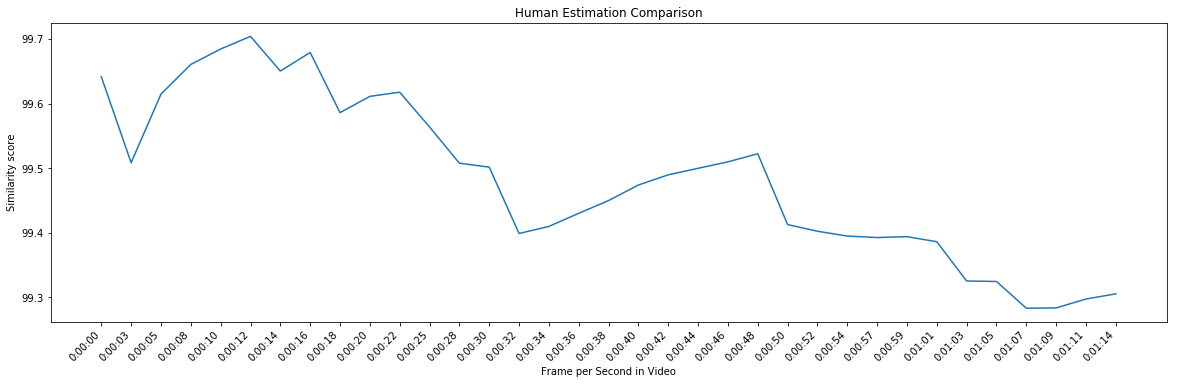

In [80]:
import matplotlib.pyplot as plt
aver_d = list(tabled.loc[::20,'Cosine Similarity score'])
timed_d = list(tabled.loc[::20,'Timestamp'])

plt.plot(timed_d, aver_d)
plt.rcParams["figure.figsize"] = (20,5.5)
# plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')
plt.title('Human Estimation Comparison')
plt.xlabel('Frame per Second in Video')
plt.ylabel('Similarity score')
plt.show()

## --------------------------------------- Code Backup --------------------------------

## 1. ลองเอาวีดีโอเข้าไป

In [ ]:
import numpy as np
import cv2
import time

vdo = cv2.VideoCapture("./Lisa2.mp4")

if vdo.isOpened():
    print('Video file opened successfully.')
else:
    print('Error. Video file could not be opened.')
    
# frames per second ==> lower it to slow down the video
# fps = 10000

while vdo.isOpened():
    
    prevTime = time.time()
    ret, img = vdo.read()
    if not ret:
        print("Error, no image from video file")
        break
    
    rt = 0.65 # percent of original size
    w = int(img.shape[1] * rt)
    h = int(img.shape[0] * rt)
    img = cv2.resize(img, (w, h))
    
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.applyColorMap(img, cv2.COLORMAP_WINTER)
    img3 = img.copy()
    
    kernel = np.array([[-2, -2, -2],
                       [0, 0, 0],
                       [1, 1, 1]], dtype=np.float32)
    kernel = cv2.flip(kernel, flipCode=-1)
    top = bottom = kernel.shape[0] // 2
    left = right = kernel.shape[1] // 2
    src_pad = cv2.copyMakeBorder(img.copy(),
                                 top, bottom, left, right,
                                 cv2.BORDER_CONSTANT, value=0)
    dst = cv2.filter2D(src_pad, -1, kernel)
    img4 = dst[top:dst.shape[0]-bottom, left:dst.shape[1]-right]
    
    img5 = cv2.medianBlur(img, 7) 
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    thresh1 = 100
    thresh2 = 150
    canny = cv2.Canny(gray_img, thresh1, thresh2)
    img6 = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
    
    result1 = np.hstack((img1, img2, img3))
    result2 = np.hstack((img4, img5, img6))
    result = np.vstack((result1, result2))
    
    # to calculate FPS
    currTime = time.time()
    diff_sec = currTime - prevTime 
    try :
    
        fps = 1 / diff_sec
        prevTime = currTime
        cv2.putText(result1, f'FPS: {int(fps)}', (65, 15), cv2.FONT_HERSHEY_PLAIN, 1, (0, 20, 255), 2)
    except :
        pass
    cv2.imshow("1_Shiba", result)
    
    # time.sleep(1/fps)
    
    # Wait 1 millisecond for any key press        
    if (cv2.waitKey(1)== 27):       # press ESC to quit
        break
        
cv2.destroyAllWindows() # close all windows
if vdo.isOpened():
    vdo.release()

# 2. ลองเอาวีดีโอเข้าไป 2 วีดีโอ (ใช้ Code อจ.)

In [ ]:
bgv = cv2.VideoCapture("./2_green_dancing.mp4")
hmv = cv2.VideoCapture("./2_green_dancing.mp4")

if bgv.isOpened() and hmv.isOpened() :
    print('Video file opened successfully.')
else:
    print('Error. Video file could not be opened.')

# frames per second ==> lower it to slow down the video
# fps = 10000
while True :
    ret1, frame1 = bgv.read()
    ret2, frame2 = hmv.read()

    # time.sleep(1/fps)
    rt = 0.7 # percent of original size
#     w = int(frame1.shape[1] * rt)
#     h = int(frame1.shape[0] * rt)
    whm = int(frame1.shape[1] * rt * 0.75)
    hhm = int(frame1.shape[0] * rt * 0.75)
    bg = cv2.resize(frame1, (whm, hhm))
    hm = cv2.resize(frame2, (whm, hhm))
    
    result = np.hstack((bg,hm))

    cv2.imshow("1_Shiba", result)
    # time.sleep(1/fps)

    # Wait 1 millisecond for any key press        
    if (cv2.waitKey(1)== 27):       # press ESC to quit
        break

cv2.destroyAllWindows() # close all windows
if bgv.isOpened():
        bgv.release() 
if hmv.isOpened():
        hmv.release()

## 3. Human Pose Estimation ( 1 video)

### Define function คำนวณองศา

### ลองนำ HPE (Media pose ไปใช้ในวีดีโอ + คำนวณ Angle ด้วย)

In [ ]:
import numpy as np
import cv2
import time

bgv = cv2.VideoCapture("./lisa2.mp4")

if bgv.isOpened() :
    print('Video file opened successfully.')
else:
    print('Error. Video file could not be opened.')

# frames per second ==> lower it to slow down the video
# fps = 10000
# while cap.isOpened():
#     ret, frame = cap.read()

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    while True:
        ret1, frame = bgv.read()
        print(frame.shape)
        # print(bg.shape, hm.shape, de.shape)  

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                       
        except:
            pass
        cv2.circle(image,(100,100),4,(0,0,255),2)
        
        cv2.circle(image,(int((landmarks[mp_pose.PoseLandmark.NOSE.value].x)*(frame.shape[0])),int((landmarks[mp_pose.PoseLandmark.NOSE.value].y)*(frame.shape[1]))),4,(0,0,255),2)
        # Render detections
        mp_drawing.draw_landmarks(image, [landmarks[mp_pose.PoseLandmark.NOSE.value].x,landmarks[mp_pose.PoseLandmark.NOSE.value].y], mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        # time.sleep(1/fps)

    #     result = np.hstack((bg2,hm2))

        cv2.imshow("1_Shiba", image)
        # time.sleep(1/fps)

        # Wait 1 millisecond for any key press        
        if (cv2.waitKey(1)== 27):       # press ESC to quit
            break
            

    cv2.destroyAllWindows() # close all windows
    if bgv.isOpened():
        bgv.release() 
    # if hmv.isOpened():
    #     hmv.release()

## 4. Human Pose Comparison (2 Video)

In [ ]:
import numpy as np
import cv2
import time

bgv = cv2.VideoCapture("./2_green_dancing.mp4")
hmv = cv2.VideoCapture("./2_green_dancing.mp4")
# hmv = cv2.VideoCapture("./1_shiba.mp4")

if bgv.isOpened() and hmv.isOpened():
    print('Video file opened successfully.')
else:
    print('Error. Video file could not be opened.')

# frames per second ==> lower it to slow down the video
# fps = 10000
# while cap.isOpened():
#     ret, frame = cap.read()

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    while True:
        ret1, bg1 = bgv.read()
        ret2, hm2 = hmv.read()
        
#         print(ret1)
#         if bg1[0,0,0]>16 :
#             pass
#         else :
#             break
        
        whm = int(bg1.shape[1] *rt*0.9)
        hhm = int(hm2.shape[0] *rt* 0.9)
        frame1 = cv2.resize(bg1, (whm, hhm))
        frame2 = cv2.resize(hm2, (whm, hhm))

        # Recolor image to RGB
        image1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
        image2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
        image1.flags.writeable = False
        image2.flags.writeable = False

        # Make detection
        results1 = pose.process(image1)
        results2 = pose.process(image2)

        # Recolor back to BGR
        image1.flags.writeable = True
        image2.flags.writeable = True
        image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
        image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks1 = results1.pose_landmarks.landmark
        
            # Get coordinates
            shoulder1 = [landmarks1[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks1[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow1 = [landmarks1[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks1[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist1 = [landmarks1[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks1[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            # Calculate angle
            angle1 = calculate_angle(shoulder1, elbow1, wrist1)
#             print(landmarks1)
        
        
            landmarks2 = results2.pose_landmarks.landmark
#             print(landmarks2)
            # Get coordinates
            shoulder2 = [landmarks2[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks2[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow2 = [landmarks2[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks2[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist2 = [landmarks2[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks2[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            # Calculate angle
            angle2 = calculate_angle(shoulder2, elbow2, wrist2)
            print(angle2-angle1)

            # Visualize angle
            cv2.putText(image1, str(angle1), 
                        tuple(np.multiply(elbow1, [100, 480]).astype(int)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                        )
            cv2.putText(image2, str(angle2), 
                        tuple(np.multiply(elbow2, [640, 100]).astype(int)), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                        )                       

        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image1, results1.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )

        mp_drawing.draw_landmarks(image2, results2.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                    )  
  
        result = np.hstack((image1,image2))
        cv2.imshow("1_Shiba", result)
#         time.sleep(1/fps)
        
        # Wait 1 millisecond for any key press        
        if (cv2.waitKey(1)== 27):       # press ESC to quit
            break
        
    cv2.destroyAllWindows() # close all windows
    if bgv.isOpened():
        bgv.release() 
#     if hmv.isOpened():
#         hmv.release()

In [ ]:
# cap = cv2.VideoCapture(0)
hmv = cv2.VideoCapture("./Lisa2.mp4")
## Setup mediapipe instance

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    
    while True :
        
        ret, frame = hmv.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        
        # Render detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
#                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
#                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
#                                  )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
for lndmrk in mp_pose.PoseLandmark:
    
    print(lndmrk.value,lndmrk)

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].visibility

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

In [ ]:
mp_pose.PoseLandmark.LEFT_ELBOW.value

In [ ]:
findCosineSimilarity_1([3,3],[5,5])